# NaN Boxing Benchmarks

In [1]:
# Librairies
%pip install -q matplotlib numpy pandas scikit-learn
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
INTERPRETER = "./target/release/som-interpreter-bc"
LIBS = "core-lib/Smalltalk core-lib/Examples/Benchmarks core-lib/Examples/Benchmarks/LanguageFeatures core-lib/Examples/Benchmarks/TestSuite core-lib/Examples/Benchmarks/ValBenchmark"

def exec_bench(name, runs=10):
    runtimes = []
    allocations = []

    for i in range(runs):
        cmd = f"{INTERPRETER} -c {LIBS} . -- BenchmarkHarness {name} 1"
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        output = result.stdout

        runtime = re.search(r"runtime: (\d+)us", output)
        allocated = re.search(r"Allocated:    (\d+)bytes", output)
        if runtime:
            runtimes.append(int(runtime.group(1)))
        if allocated:
            allocations.append(int(allocated.group(1)))

        else:
            print("Runtime not found in output:")
            print(output)
    
    return (runtimes, allocations)


In [3]:
def plot_results(name, runtimes, allocations):
    import matplotlib.pyplot as plt

    iterations = list(range(1, len(runtimes) + 1))
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_alloc = sum(allocations) / len(allocations)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Runtime plot (top)
    ax1.plot(iterations, runtimes, marker='o', linestyle='-', color='blue', label='Runtime (μs)')
    ax1.axhline(avg_runtime, color='blue', linestyle='--', label=f'Avg Runtime: {avg_runtime:.1f}μs')
    ax1.set_ylabel('Runtime (μs)')
    ax1.set_title(f'Benchmark: {name}')
    ax1.legend()
    ax1.grid(True)

    # Allocation plot (bottom)
    ax2.bar(iterations, allocations, color='orange', alpha=0.6, label='Allocation (bytes)')
    ax2.axhline(avg_alloc, color='orange', linestyle='--', label=f'Avg Alloc: {avg_alloc:.0f} bytes')
    ax2.set_ylabel('Allocation (bytes)')
    ax2.set_xlabel('Iteration')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Benchmark: DoubleBench, Runs: 100, Runtimes: [14, 6, 6, 6, 5, 4, 5, 5, 6, 26, 5, 5, 5, 5, 4, 6, 5, 4, 6, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 4, 4, 4, 4, 5, 6, 5, 6, 20, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 4, 6, 6, 5, 5, 4, 5, 4, 4, 4, 3, 7, 3, 3, 4, 4, 4, 4, 4, 3], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


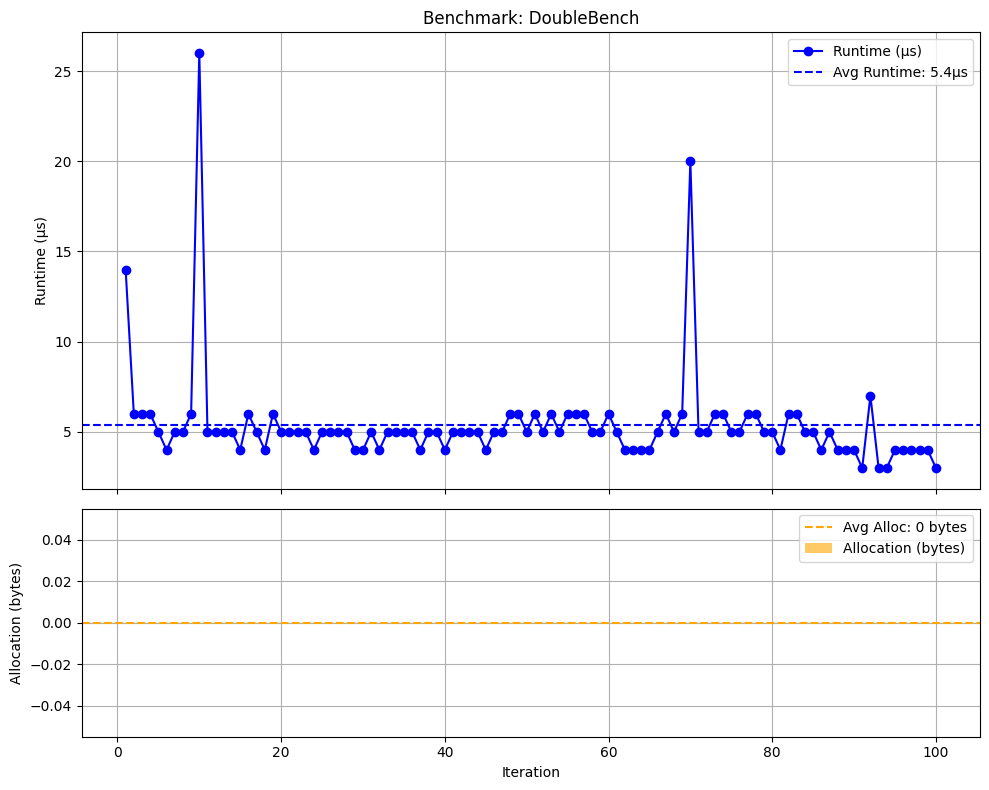

Benchmark: DoubleMedBench, Runs: 100, Runtimes: [10, 9, 11, 10, 8, 9, 9, 9, 8, 7, 7, 7, 8, 9, 10, 9, 8, 8, 10, 44, 10, 9, 8, 9, 8, 8, 10, 8, 8, 10, 10, 10, 10, 10, 10, 10, 9, 27, 9, 11, 10, 10, 10, 10, 9, 10, 10, 151, 11, 11, 9, 42, 9, 9, 9, 10, 9, 8, 8, 9, 42, 9, 10, 10, 10, 9, 57, 8, 8, 8, 9, 8, 10, 9, 8, 8, 8, 8, 7, 7, 48, 10, 9, 9, 9, 10, 9, 10, 11, 10, 9, 9, 11, 9, 10, 10, 10, 9, 9, 10], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


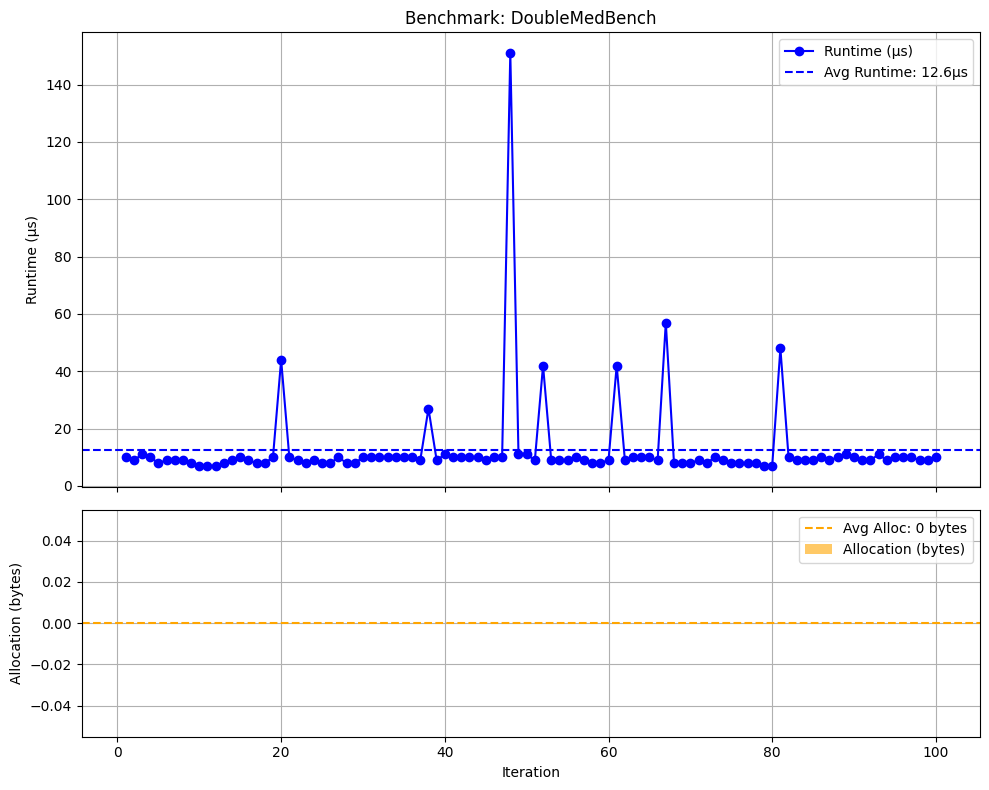

Benchmark: DoubleHighBench, Runs: 100, Runtimes: [14451, 11263, 10958, 10917, 12183, 11312, 11028, 11197, 11359, 12521, 12080, 11126, 11531, 14407, 11082, 11407, 10859, 15291, 11488, 11742, 11196, 11160, 11247, 11659, 14429, 12378, 11460, 15516, 12498, 11139, 11250, 11001, 13528, 12014, 11020, 13042, 11132, 10853, 11055, 11239, 11020, 11713, 11819, 11907, 11371, 11129, 10837, 11124, 11343, 10989, 11285, 11074, 10861, 10796, 13284, 11106, 10909, 10856, 10729, 12467, 10869, 10667, 10763, 10885, 10851, 10886, 10984, 11014, 10998, 11041, 12733, 11021, 10885, 10756, 10855, 11021, 10688, 10874, 10825, 10842, 11302, 10879, 11045, 10834, 10888, 11006, 10799, 11048, 11281, 10922, 11223, 12069, 14182, 11863, 11312, 11758, 11857, 11316, 13568, 13275], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

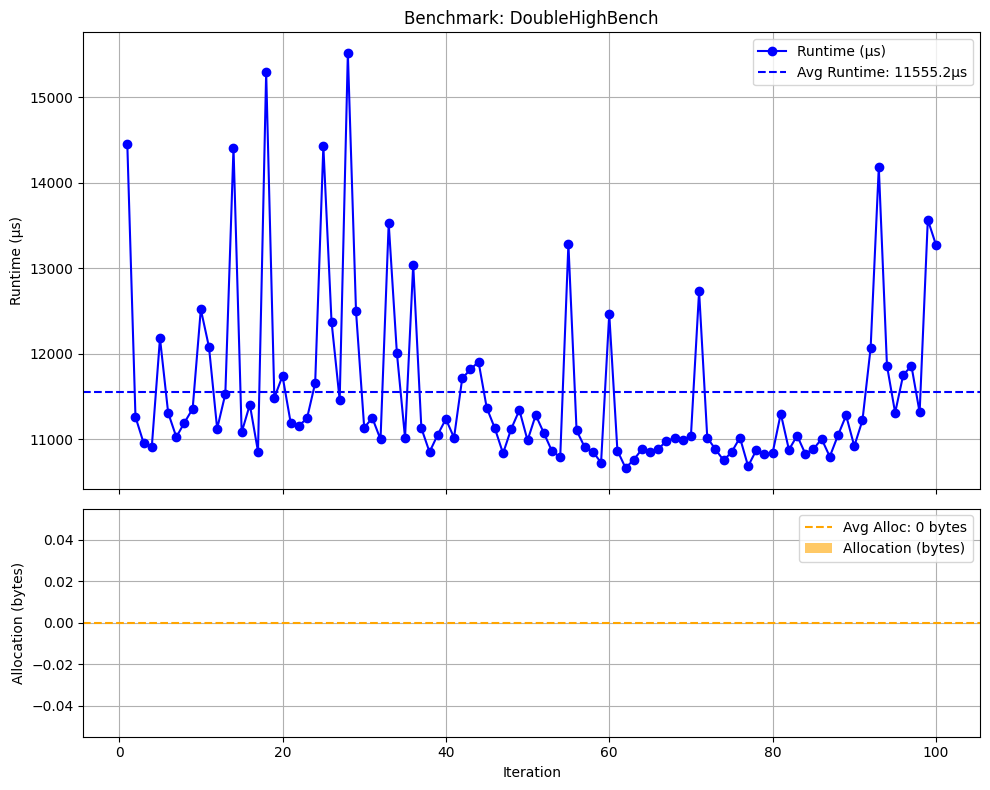

Benchmark: DoubleSqrtBench, Runs: 100, Runtimes: [1236, 1315, 1585, 1225, 1259, 1533, 1455, 1209, 1227, 1263, 1203, 1309, 1241, 1453, 1270, 1418, 1423, 2101, 1456, 1786, 2119, 1255, 1254, 1574, 1524, 1326, 1552, 1277, 1232, 1220, 1268, 1290, 1258, 1227, 1230, 1750, 1333, 1707, 1214, 1822, 1201, 1430, 1185, 1203, 1207, 1306, 1196, 1228, 1280, 1209, 1214, 1213, 1219, 1424, 1207, 1253, 1225, 1184, 1912, 1208, 1195, 1182, 1170, 1344, 1439, 1424, 1251, 1213, 1432, 1211, 1183, 1186, 1184, 1193, 1261, 1198, 1262, 1300, 1210, 1221, 1179, 1524, 1180, 1172, 1191, 1189, 1178, 1181, 1231, 1202, 1271, 1212, 1176, 1179, 1211, 1211, 1193, 1218, 1210, 1221], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


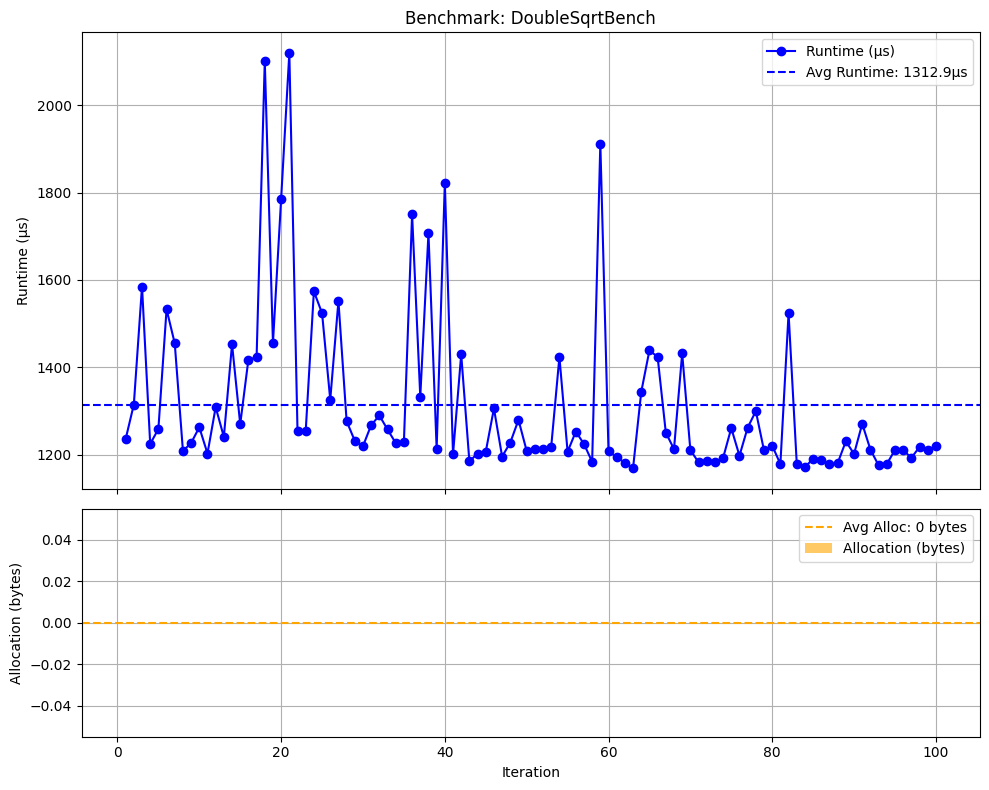

Benchmark: DoubleLExpBench, Runs: 100, Runtimes: [36, 50, 39, 38, 34, 38, 33, 35, 36, 39, 36, 34, 33, 34, 35, 37, 36, 35, 116, 40, 40, 39, 34, 33, 36, 35, 38, 37, 36, 38, 36, 36, 34, 36, 33, 34, 35, 37, 34, 37, 33, 36, 38, 38, 34, 37, 37, 33, 34, 33, 36, 38, 142, 153, 36, 203, 39, 33, 34, 34, 37, 36, 37, 36, 34, 35, 34, 35, 34, 35, 34, 35, 37, 37, 35, 33, 35, 35, 36, 36, 35, 36, 34, 35, 67, 41, 35, 36, 38, 34, 36, 34, 37, 40, 37, 131, 35, 36, 33, 37], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


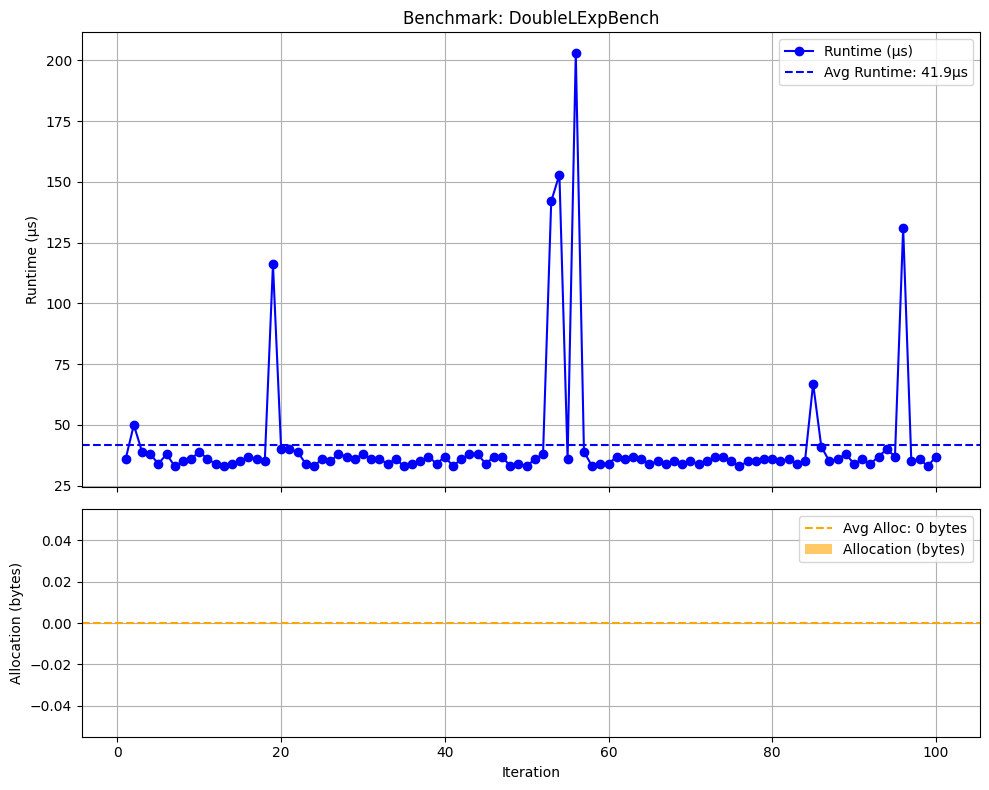

Benchmark: IntegerBench, Runs: 100, Runtimes: [4, 3, 4, 4, 4, 4, 2, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 5, 4, 4, 3, 4, 4, 4, 3, 3, 2, 3, 3, 4, 3, 6, 3, 4, 4, 4, 4, 4, 3, 5, 3, 4, 4, 3, 4, 4, 6, 9, 7, 4, 3, 3, 3, 6, 4, 4, 3, 6, 4, 4, 3, 3, 3, 9, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 4, 4, 3, 4, 6, 4, 3, 4, 4, 3], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


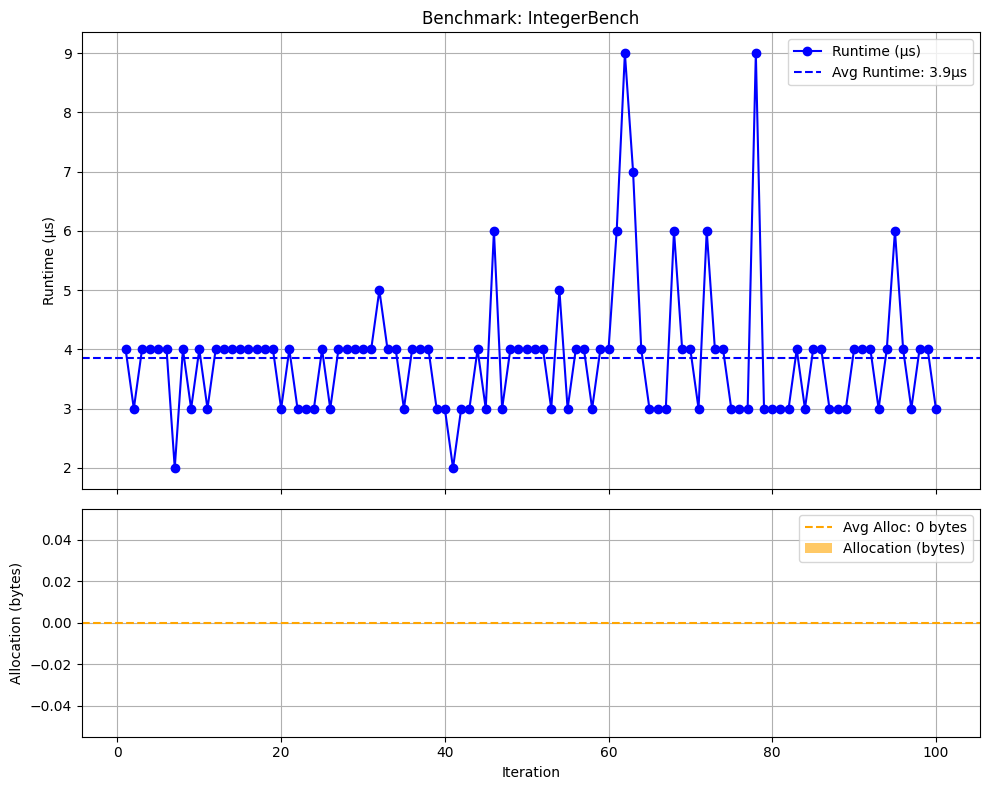

Benchmark: IntegerMedBench, Runs: 100, Runtimes: [498, 21, 22, 16, 14, 13, 14, 13, 13, 14, 12, 13, 13, 12, 13, 12, 14, 14, 13, 12, 14, 14, 13, 14, 13, 12, 11, 12, 13, 12, 12, 11, 11, 11, 13, 14, 14, 13, 15, 13, 13, 17, 13, 13, 13, 12, 12, 12, 12, 12, 17, 68, 14, 14, 16, 14, 15, 14, 13, 16, 41, 13, 13, 13, 16, 13, 13, 14, 66, 13, 14, 13, 12, 12, 11, 11, 12, 12, 13, 12, 12, 12, 12, 13, 12, 13, 13, 13, 12, 13, 11, 12, 12, 14, 13, 14, 13, 13, 13, 15], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


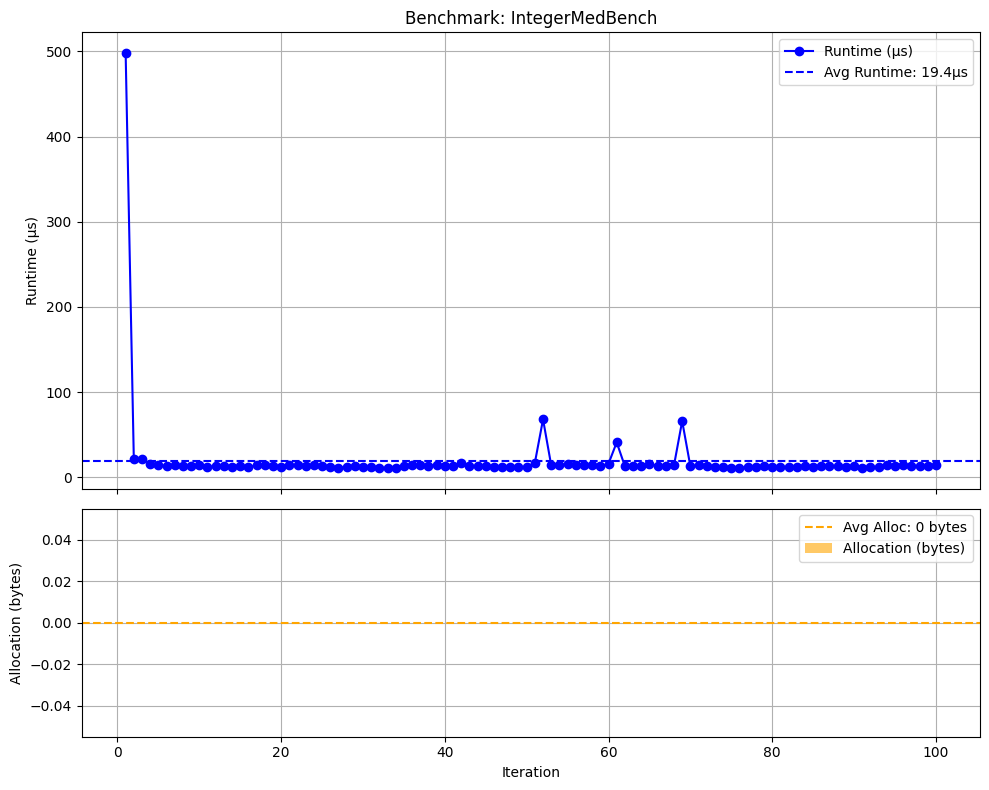

Benchmark: IntegerHighBench, Runs: 100, Runtimes: [248, 115, 70, 72, 69, 70, 70, 91, 77, 75, 71, 69, 71, 72, 69, 71, 69, 68, 68, 71, 71, 72, 81, 69, 70, 70, 70, 69, 72, 70, 69, 73, 69, 69, 67, 67, 70, 69, 67, 69, 107, 70, 70, 73, 68, 66, 67, 71, 74, 85, 72, 76, 79, 66, 67, 67, 69, 85, 68, 68, 68, 71, 81, 70, 69, 77, 127, 69, 70, 73, 69, 69, 72, 70, 70, 72, 72, 71, 70, 70, 71, 73, 77, 72, 297, 395, 103, 85, 69, 73, 83, 69, 74, 70, 69, 73, 75, 77, 70, 71], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


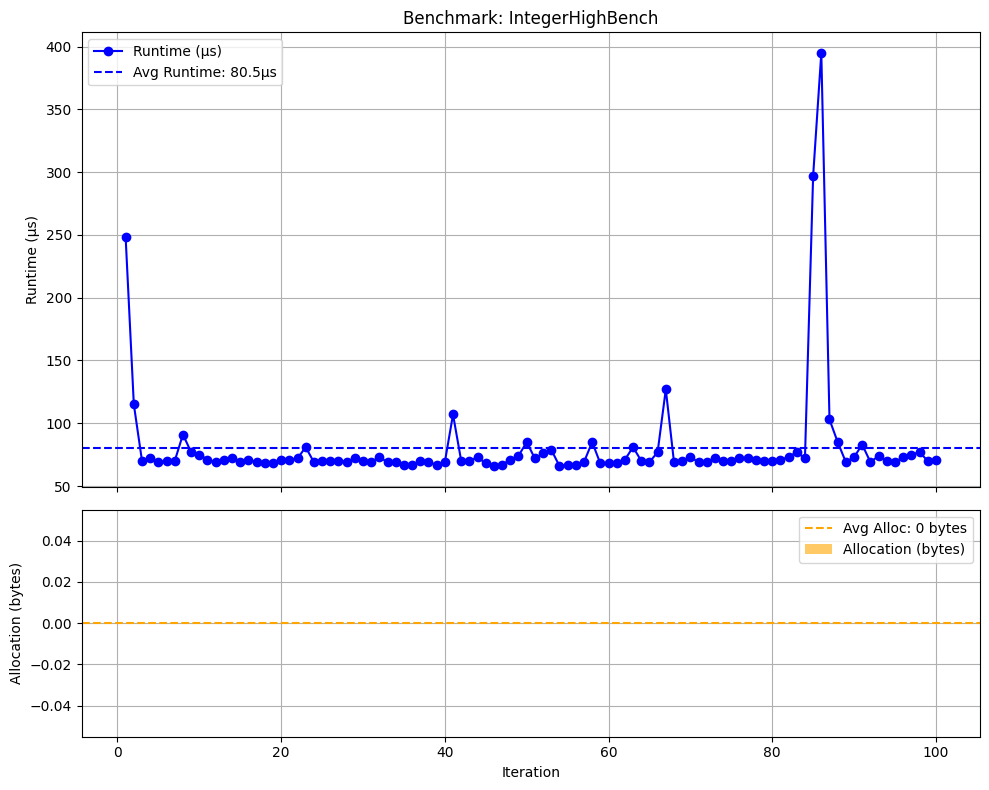

Benchmark: IntegerExpBench, Runs: 100, Runtimes: [757, 52, 56, 52, 51, 52, 64, 55, 56, 51, 50, 60, 68, 117, 51, 51, 56, 59, 50, 71, 50, 51, 52, 51, 51, 51, 50, 53, 83, 52, 54, 52, 49, 56, 60, 193, 109, 54, 57, 61, 56, 50, 51, 51, 51, 50, 51, 53, 58, 60, 51, 54, 52, 54, 55, 49, 85, 55, 56, 53, 51, 61, 53, 54, 51, 53, 53, 51, 52, 49, 51, 55, 49, 51, 49, 50, 49, 55, 53, 52, 51, 52, 54, 56, 57, 54, 54, 57, 50, 54, 53, 50, 49, 52, 53, 51, 51, 52, 51, 49], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


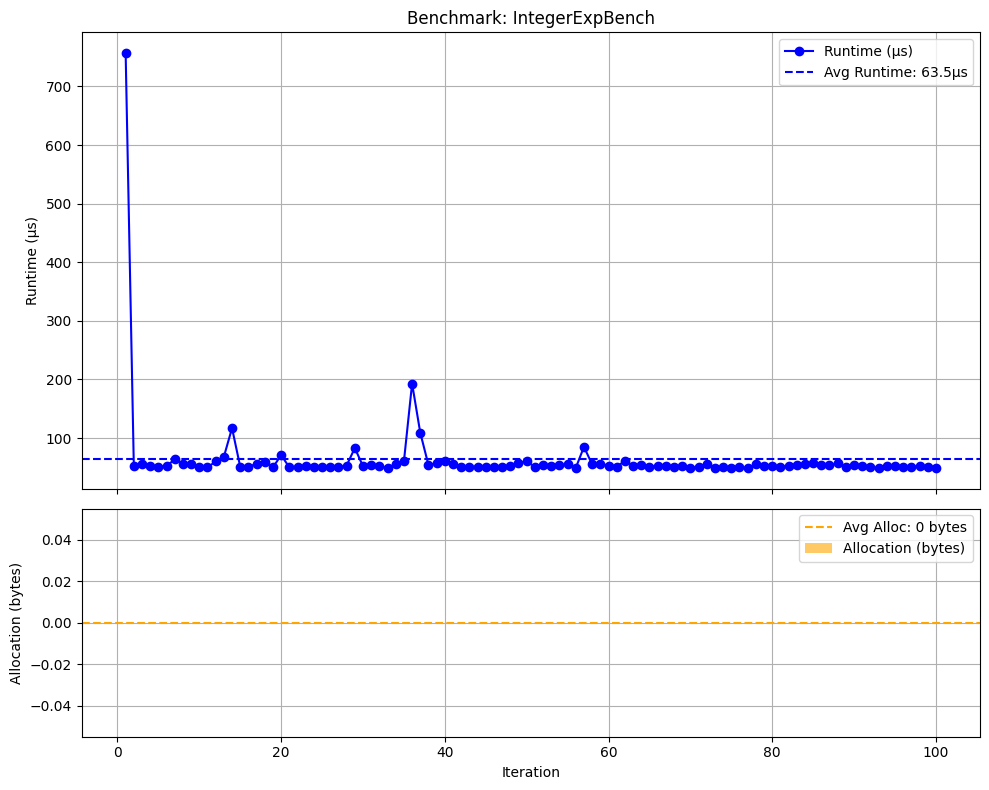

Benchmark: IntegerBigBench, Runs: 100, Runtimes: [1314, 552, 567, 543, 557, 560, 555, 528, 540, 594, 554, 914, 558, 556, 526, 541, 554, 562, 545, 559, 595, 703, 583, 544, 760, 546, 663, 551, 680, 731, 543, 548, 533, 543, 555, 553, 537, 555, 587, 618, 537, 665, 532, 538, 564, 577, 549, 559, 557, 553, 604, 544, 675, 986, 604, 561, 537, 623, 526, 553, 573, 550, 580, 544, 1977, 604, 561, 567, 569, 588, 557, 595, 592, 656, 574, 1030, 1089, 731, 810, 593, 554, 555, 579, 575, 604, 576, 558, 762, 547, 813, 840, 579, 545, 551, 687, 1145, 550, 582, 570, 562], Allocations: [331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776

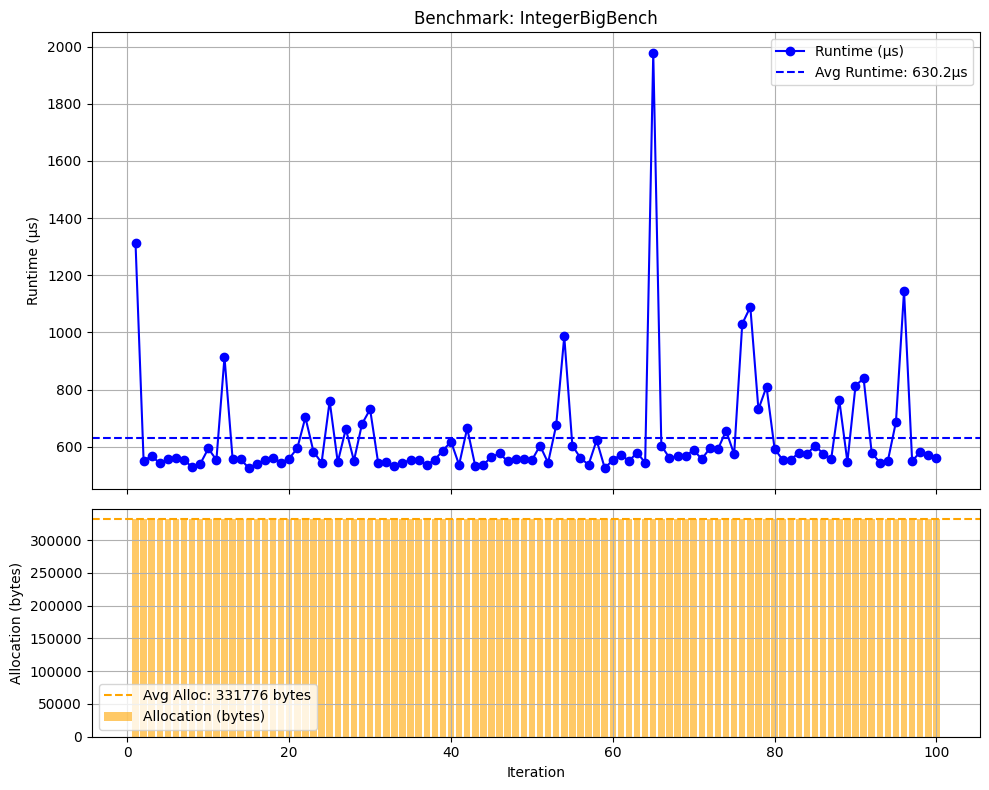

In [4]:
# General Configuration
BENCHMARKS = [
    "DoubleBench",
    "DoubleMedBench",
    "DoubleHighBench",
    "DoubleSqrtBench",
    "DoubleLExpBench",
    "IntegerBench",
    "IntegerMedBench",
    "IntegerHighBench",
    "IntegerExpBench",
    "IntegerBigBench"
]

runs = 100

for benchmark in BENCHMARKS:
    outcome = exec_bench(benchmark, runs)
    print(f"Benchmark: {benchmark}, Runs: {runs}, Runtimes: {outcome[0]}, Allocations: {outcome[1]}")
    plot_results(benchmark, outcome[0], outcome[1])